In [1]:
#importing important lib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading dataset
import pandas as pd
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

train_df.head()

Train Shape: (132379, 14)
Test Shape: (33095, 14)


,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [3]:
train_df.dtypes

year                     int64
month                    int64
day                      int64
order                    int64
country                  int64
session_id               int64
page1_main_category      int64
page2_clothing_model    object
colour                   int64
location                 int64
model_photography        int64
price                    int64
price_2                  int64
page                     int64
dtype: object

In [4]:
train_df['page2_clothing_model'].value_counts()

page2_clothing_model
B4     2824
A2     2389
A11    2247
P1     2134
B10    2011
       ... 
P31      64
P66      42
P79       2
P22       2
P54       1
Name: count, Length: 216, dtype: int64

In [5]:
#Encoding
encoders = {}
for col in train_df.columns:
    if train_df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            train_df[col] = label_encoder.fit_transform(train_df[col])
            encoders[col] = label_encoder

In [6]:

encoders

{'page2_clothing_model': LabelEncoder()}

In [8]:
# saving encoders in pkl format
import pickle

# Save the encoders dictionary to a file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Label encoders saved successfully.")

Label encoders saved successfully.


In [9]:
print(train_df.dtypes)

year                    int64
month                   int64
day                     int64
order                   int64
country                 int64
session_id              int64
page1_main_category     int64
page2_clothing_model    int64
colour                  int64
location                int64
model_photography       int64
price                   int64
price_2                 int64
page                    int64
dtype: object


In [10]:
#create target
train_df['purchase_flag'] = train_df['order'].apply(lambda x: 1 if x >=4 else 0)

# Check distribution
print(train_df['purchase_flag'].value_counts())


purchase_flag
1    85422
0    46957
Name: count, dtype: int64


In [11]:
# regression target
train_df ["revenue"] = train_df["price"]* train_df["price_2"]
train_df.drop(["price","price_2"], axis=1,inplace=True)

In [12]:
train_df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,page,purchase_flag,revenue
0,2008,6,22,21,29,15648,3,88,13,1,2,2,1,48
1,2008,5,19,6,29,10018,2,60,13,3,1,2,1,57
2,2008,7,15,2,29,19388,3,80,9,5,1,1,0,48
3,2008,5,2,2,29,7181,2,45,2,4,1,1,0,86
4,2008,6,9,16,29,13493,2,66,9,5,1,2,1,57


In [13]:
train_df["order"].unique()

array([ 21,   6,   2,  16,   1,  11,   3,  18,  13,   4,  14,   5,   9,
        10,  32,  24,  46,  30,  17,  12,  25,  27,   7,  40,  29,  59,
         8,  41,  20,  36,  92,  22,  66,  38,  60,  26,  23,  84,  45,
        19,  35,  52,  61,  15,  37,  49,  63,  33, 101,  43,  34,  80,
       121,  79,  31,  39,  28,  47,  55,  54,  53,  42, 114,  62, 154,
        44,  78,  58,  99,  50,  70,  56, 104,  57,  65,  48, 105, 125,
        75, 133,  74,  67,  96, 116, 134,  82,  68,  90, 111,  51,  85,
        76,  83,  86,  73,  72, 118,  77, 103, 124,  95,  91,  94,  64,
       175,  81, 179, 113, 109,  71,  69,  87,  88, 183,  89, 106, 100,
       110, 135, 153, 117, 155, 102, 138, 159, 151,  98, 166, 107, 128,
       191, 131, 177, 139, 146, 120, 129, 187, 136, 130, 149, 162, 144,
        93, 182, 169,  97, 119, 142, 150, 189, 176, 145, 115, 127, 160,
       122, 178, 108, 141, 112, 126, 158, 161, 132, 168, 156, 185, 173,
       167, 188, 143, 171, 174, 140, 180, 137, 172, 170, 147, 14

In [14]:
# handling class imbalance:- SMOTENC TECHNIQUE
#Identify categorical columns for SMOTENC
train_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [15]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE, SMOTENC

# Define features (X) and target (y)
X = train_df.drop('purchase_flag', axis=1)
y = train_df['purchase_flag']

categorical_cols = ['country', 'colour','page1_main_category', 'page2_clothing_model']

# SMOTE needs categorical columns as indices for non-continuous features
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Apply SMOTE
smote = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['purchase_flag'] = y_resampled

# Verify the new class distribution
df_resampled['purchase_flag'].value_counts()

purchase_flag
1    85422
0    85422
Name: count, dtype: int64

In [17]:
#MODEL BUILDING
import warnings
import numpy as np
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer

warnings.filterwarnings("ignore")

In [18]:
df_resampled.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'page', 'revenue', 'purchase_flag'],
      dtype='object')

In [ ]:


# # Define column groups
# nominal_data = ['country', 'page1_main_category', 'page2_clothing_model',
#                 'colour', 'location', 'model_photography']
# log_scale_cols = ['order', 'revenue', 'page']  # Applying log + scaling

# # pos_skewed_cols = ['order', 'revenue', 'page']
# # scaling_cols = ['order', 'revenue']  # Standard Scaler

# # Define transformation
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), nominal_data),
#         ('log', FunctionTransformer(np.log1p, validate=True), pos_skewed_cols),
#          ('scaler', StandardScaler(), scaling_cols) # Standard Scaler
#     ]
    
# )

# # Define pipeline
# #pipeline = Pipeline(steps=[
#     #('preprocessing', preprocessor),
#     #('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
# #])

# # Split data
# X = train_df.drop(columns=['purchase_flag','session_id'])
# y = train_df['purchase_flag']



In [19]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Define column groups
nominal_data = ['country', 'page1_main_category', 'page2_clothing_model',
                'colour', 'location', 'model_photography']
log_scale_cols = ['order', 'revenue', 'page']  # Apply log + scaling

# Define transformation pipelines
log_scale_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), nominal_data),
        ('logscale', log_scale_pipeline, log_scale_cols)
    ],
    remainder='passthrough'
)

# Define full pipeline with classifier
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Split data
X = train_df.drop(columns=['purchase_flag', 'session_id'], errors='ignore')
y = train_df['purchase_flag']

# Fit the pipeline
# pipeline.fit(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Logistic Regression: Accuracy = 0.9838
Logistic Regression: Accuracy = 0.9838, AUC = 0.9986824361084138
Decision Tree: Accuracy = 1.0000
Decision Tree: Accuracy = 1.0000, AUC = 1.0
K-Nearest Neighbors: Accuracy = 0.8887
K-Nearest Neighbors: Accuracy = 0.8887, AUC = 0.9467470279576791
Random Forest: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000, AUC = 1.0
XGBoost Classifier: Accuracy = 1.0000
XGBoost Classifier: Accuracy = 1.0000, AUC = 1.0


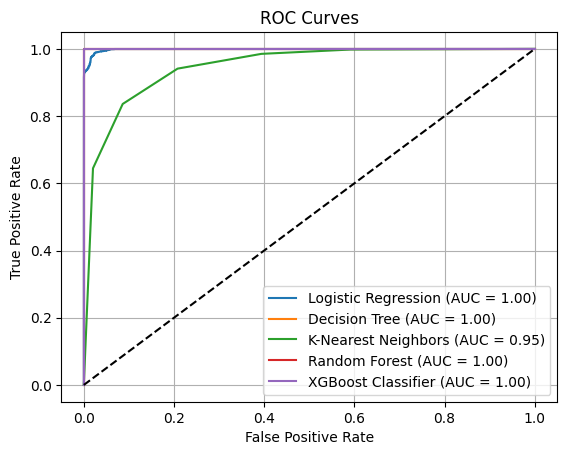

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost Classifier": XGBClassifier(n_estimators= 200,use_label_encoder=False, eval_metric='logloss')
}

# Loop through models
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name}: Accuracy = {accuracy:.4f}")
    # AUC calculation
    if hasattr(model, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)

        # Optional: Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    else:
        auc = None
    print(f"{name}: Accuracy = {accuracy:.4f}, AUC = {auc if auc is not None else 'N/A'}")
    

    
# Show ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()



In [22]:
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('label', ...), ('logscale', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
import pickle

# Save the model
with open('xgboost_classifier_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [24]:
X_train.columns

Index(['year', 'month', 'day', 'order', 'country', 'page1_main_category',
       'page2_clothing_model', 'colour', 'location', 'model_photography',
       'page', 'revenue'],
      dtype='object')

In [25]:
# regression model
train_df['purchase_flag'] == 1

0          True
1          True
2         False
3         False
4          True
          ...  
132374    False
132375     True
132376     True
132377     True
132378     True
Name: purchase_flag, Length: 132379, dtype: bool

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Step 1: Filter buyers only
buyers_df = train_df[train_df['purchase_flag'] == 1]

# Step 2: Define target and features
y = buyers_df['revenue']
X = buyers_df.drop(columns=['revenue', 'purchase_flag','session_id'])

# Step 3: Define column groups
nominal_data = ['country', 'page1_main_category', 'page2_clothing_model',
                'colour', 'location', 'model_photography']
log_scale_cols = ['order', 'page']

# Step 4: Create preprocessing pipeline
log_scale_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), nominal_data),
        ('logscale', log_scale_pipeline, log_scale_cols)
    ],
    remainder='passthrough'
)

# Step 5: Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Compare models
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4)
    })
    print(f"{name} → RMSE: {rmse:.2f}, R²: {r2:.4f}")



Linear Regression → RMSE: 10.31, R²: 0.4306
Random Forest → RMSE: 0.01, R²: 1.0000
Gradient Boosting → RMSE: 5.84, R²: 0.8176
XGBoost → RMSE: 0.04, R²: 1.0000


In [27]:
train_df['revenue']

0         48
1         57
2         48
3         86
4         57
          ..
132374    48
132375    56
132376    76
132377    40
132378    57
Name: revenue, Length: 132379, dtype: int64

In [28]:
pipeline

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('label', ...), ('logscale', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
import pickle

# Saving the trained regression pipeline
with open('revenue_regression_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


In [30]:
#clustering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import pandas as pd

# Sample preprocessing
nominal_data = ['country', 'page1_main_category', 'page2_clothing_model',
                'colour', 'location', 'model_photography']
pos_skewed_cols = ['order', 'page']
scaling_cols = ['order']

preprocessor = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), nominal_data),
        ('log', FunctionTransformer(np.log1p, validate=True), pos_skewed_cols),
        ('scaler', StandardScaler(), scaling_cols)
    ],
    remainder='passthrough'
)

# Clustering pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clustering', KMeans(n_clusters=3, random_state=42))
])

# Fit and assign clusters
X = train_df.drop(columns=['revenue', 'purchase_flag'])  #  target columns should be excluded in clustering
pipeline.fit(X)
train_df['cluster'] = pipeline.named_steps['clustering'].labels_

In [31]:
pipeline

,steps,"[('preprocessing', ...), ('clustering', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('label', ...), ('log', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
# clustering
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Preprocess numeric data
def preprocess_data(df, numeric_cols):
    scaler = StandardScaler()
    return scaler.fit_transform(df[numeric_cols])

# Step 2: Clustering functions
def run_kmeans(data, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(data)
    wcss = model.inertia_
    return labels, wcss

def run_dbscan(data, eps=0.5, min_samples=5):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(data)
    return labels

def run_hierarchical(data, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(data)
    return labels

# Step 3: Evaluation metrics
def evaluate_clustering(data, labels):
    unique_labels = set(labels)
    if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
        return {'Silhouette': None, 'Davies-Bouldin': None}
    sil = silhouette_score(data, labels)
    db = davies_bouldin_score(data, labels)
    return {'Silhouette': round(sil, 4), 'Davies-Bouldin': round(db, 4)}

# Step 4: Run all models and compare
def compare_clustering_models(df, numeric_cols, n_clusters=3, eps=0.5, min_samples=5, max_rows_hierarchical=5000):
    data = preprocess_data(df, numeric_cols)
    results = []

    # K-Means
    k_labels, k_wcss = run_kmeans(data, n_clusters)
    k_metrics = evaluate_clustering(data, k_labels)
    results.append({
        'Model': 'K-Means',
        'WCSS': round(k_wcss, 2),
        **k_metrics
    })

    # DBSCAN
    d_labels = run_dbscan(data, eps, min_samples)
    d_metrics = evaluate_clustering(data, d_labels)
    results.append({
        'Model': 'DBSCAN',
        'WCSS': None,
        **d_metrics
    })

    # Hierarchical (skipping as data is too large)
    if data.shape[0] <= max_rows_hierarchical:
        h_labels = run_hierarchical(data, n_clusters)
        h_metrics = evaluate_clustering(data, h_labels)
        results.append({
            'Model': 'Hierarchical',
            'WCSS': None,
            **h_metrics
        })
    else:
        results.append({
            'Model': 'Hierarchical',
            'WCSS': None,
            'Silhouette': 'Skipped (Too Large)',
            'Davies-Bouldin': 'Skipped (Too Large)'
        })

    return pd.DataFrame(results)

In [33]:
df = train_df.copy() # clustering all users 
numeric_cols = ['order', 'page','country' ,'page1_main_category','page2_clothing_model','colour','location','model_photography']  

results_df = compare_clustering_models(df, numeric_cols, n_clusters=4, eps=0.6, min_samples=10)
print(results_df)

          Model       WCSS           Silhouette       Davies-Bouldin
0       K-Means  641007.34               0.2113               1.6164
1        DBSCAN        NaN               0.3037               1.2534
2  Hierarchical        NaN  Skipped (Too Large)  Skipped (Too Large)


In [34]:
# list of all numerical columns
print(train_df.dtypes)

year                    int64
month                   int64
day                     int64
order                   int64
country                 int64
session_id              int64
page1_main_category     int64
page2_clothing_model    int64
colour                  int64
location                int64
model_photography       int64
page                    int64
purchase_flag           int64
revenue                 int64
cluster                 int32
dtype: object


In [35]:
# model pkling of kmeans clustering
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define behavioral features
behavior_cols = ['order', 'page', 'country', 'page1_main_category',
                 'page2_clothing_model', 'colour', 'location', 'model_photography']

# Scale your data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[behavior_cols])

# Save the scaler
with open('scaler_kmeans.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Fit KMeans
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(data_scaled)

# Save the KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

In [36]:
#number of cluster form using kmeans
import numpy as np
import pickle

# Load the saved KMeans model
with open('kmeans_model.pkl', 'rb') as f:
    kmeans_model = pickle.load(f)

# Get cluster labels
labels = kmeans_model.labels_

# Count unique clusters
n_clusters = len(np.unique(labels))
print(f"KMeans created {n_clusters} clusters.")

KMeans created 4 clusters.


In [ ]:
# model pkling of dbscan clustering
import pickle
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

behavior_cols = ['order', 'page', 'country', 'page1_main_category',
                 'page2_clothing_model', 'colour', 'location', 'model_photography']


# Scale your data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[behavior_cols])

with open('scalar2.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# Fit DBSCAN
dbscan_model = DBSCAN(eps=2.0, min_samples=10)
dbscan_model.fit(data_scaled)
with open('dbscan_model.pkl', 'wb') as f:
    pickle.dump(dbscan_model, f)

In [ ]:
#how KMeans model has segmented dataset into four distinct clusters

import pandas as pd

labels = kmeans_model.labels_
label_counts = pd.Series(labels).value_counts().sort_index()
print("Cluster distribution:\n", label_counts)

Cluster distribution:
 0    35377
1    40584
2    15158
3    41260
Name: count, dtype: int64


In [ ]:
# summary of cluster 2
labels = kmeans_model.labels_
cluster_2_users = df[labels == 2]

In [ ]:
# sumaary of cluster2
print(cluster_2_users.describe())  

print(cluster_2_users['country'].value_counts())
print(cluster_2_users['page1_main_category'].value_counts())
print(cluster_2_users['location'].value_counts())

          year         month           day         order       country  \
count  15158.0  15158.000000  15158.000000  15158.000000  15158.000000   
mean    2008.0      5.334147     14.258873     11.440098      9.194485   
std        0.0      1.205334      8.726664     16.080550      1.556201   
min     2008.0      4.000000      1.000000      1.000000      1.000000   
25%     2008.0      4.000000      7.000000      3.000000      9.000000   
50%     2008.0      5.000000     13.000000      6.000000      9.000000   
75%     2008.0      6.000000     21.000000     13.000000      9.000000   
max     2008.0      8.000000     31.000000    186.000000     24.000000   

         session_id  page1_main_category  page2_clothing_model        colour  \
count  15158.000000         15158.000000          15158.000000  15158.000000   
mean   10742.228130             1.829859             53.484563      6.028236   
std     6412.160459             0.870602             39.518455      4.295940   
min        5.

In [ ]:
# how many cluster the dbscan is creating 
import numpy as np

labels = dbscan_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"DBSCAN created {n_clusters} clusters.")

DBSCAN created 311 clusters.


In [43]:
labels = dbscan_model.labels_
noise_ratio = (labels == -1).sum() / len(labels)
print(f"Noise ratio: {noise_ratio:.2%}")

Noise ratio: 3.62%


In [40]:
data_scaled

array([[ 0.83132327,  0.29263417,  0.28664309, ...,  1.59793955,
        -1.31915896,  1.6869402 ],
       [-0.28318201,  0.29263417,  0.28664309, ...,  1.59793955,
        -0.15233286, -0.59278924],
       [-0.58038342, -0.72394071,  0.28664309, ...,  0.65417332,
         1.01449324, -0.59278924],
       ...,
       [-0.43178271, -0.72394071,  0.28664309, ..., -0.76147603,
        -0.73574591,  1.6869402 ],
       [ 0.45982151,  1.30920905,  0.28664309, ...,  0.65417332,
         1.01449324,  1.6869402 ],
       [ 0.53412186, -0.72394071,  0.28664309, ..., -0.52553447,
        -1.31915896, -0.59278924]], shape=(132379, 8))